In [164]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
# plt.style.use('seaborn-paper')
import seaborn as sns
import joblib
# plt.rcParams['font.family']='Times New Roman,Microsoft YaHei'# 设置字体族，中文为微软雅黑，英文为Times New Roman
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['mathtext.fontset'] = 'stix'  # 设置数学公式字体为stix
plt.rcParams["text.usetex"] = False
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
datajh=pd.read_csv("groupedjhS.csv")
datacm=pd.read_csv("groupedcmS.csv")
datajhsoa=pd.read_csv("groupedjhSOA.csv")
datacmsoa=pd.read_csv("groupedcmSOA.csv")

In [ ]:
VOCs = ['Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
        'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
        'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
        'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene', 'Aniline',
        'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane', 'Triethylamine',
        'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene', '1,3-Dichloropropene', 'n-Octane',
        'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol', 'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate',
        'Trimethyl Phosphate', 'n-Decanol', 'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene',
        'n-Dodecane', 'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane']

datajhsoa["SOA"] = 0
datajh["SOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("0.25um")):(datajhsoa.columns.get_loc("0.30um"))]:
    datajhsoa["SOA"] = datajhsoa["SOA"] + datajhsoa[i]
    datajh["SOA"] = datajh["SOA"] + datajh[i]
datajhsoa["CSOA"] = 0
for i in datajhsoa.columns[(datajhsoa.columns.get_loc("C0.25um")):(datajhsoa.columns.get_loc("C0.30um"))]:
    datajhsoa["CSOA"] = datajhsoa["CSOA"] + datajhsoa[i]
datacmsoa["SOA"] = 0
datacm["SOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("0.25um")):(datacmsoa.columns.get_loc("0.30um"))]:
    datacmsoa["SOA"] = datacmsoa["SOA"] + datacmsoa[i]
    datacm["SOA"] = datacm["SOA"] + datacm[i]
datacmsoa["CSOA"] = 0
for i in datacmsoa.columns[(datacmsoa.columns.get_loc("C0.25um")):(datacmsoa.columns.get_loc("C0.30um"))]:
    datacmsoa["CSOA"] = datacmsoa["CSOA"] + datacmsoa[i]
datajh['place'] = 'JH'
datacm['place'] = 'CM'
dataall = pd.concat([datajh, datacm], axis=0)
dataall.columns = ['Time', 'TVOCs', 'Methyl Mercaptan', '1,3-Butadiene', 'Butene', 'Acetone/Butane', 'n-Propanol',
                   'Dimethyl Sulfide/Ethyl Mercaptan', 'Chloroethane', 'Isoprene', 'Pentene', 'Pentane/Isopentane',
                   'Dimethylformamide', 'Ethyl Formate', 'Carbon Disulfide/Propyl Mercaptan', 'Benzene', 'Cyclohexene',
                   'Hexene/Methylcyclopentane', 'n-Hexane/Dimethylbutane', 'Ethyl Sulfide/Butyl Mercaptan', 'Toluene',
                   'Aniline', 'Dimethyl Disulfide', '1,1-Dichloroethylene', 'Methylcyclohexane', 'n-Heptane',
                   'Triethylamine', 'n-Propyl Acetate', 'Diethylene Triamine', 'Styrene', 'Xylene/Ethylbenzene',
                   '1,3-Dichloropropene', 'n-Octane', 'n-Butyl Acetate', 'Hexyl Mercaptan', 'Xylenol',
                   'Trichloroethylene', 'Diethylbenzene', 'Methyl Benzoate', 'Trimethyl Phosphate', 'n-Decanol',
                   'Dichlorobenzene', 'Diethyl Aniline', 'Undecane', 'Tetrachloroethylene', 'n-Dodecane',
                   'Dibromomethane', '1,2,4-Trichlorobenzene', 'n-Tridecane', '1,2-Dibromoethane', '0.25um', '0.28um',
                   '0.30um', '0.35um', '0.40um', '0.45um', '0.50um', '0.58um', '0.65um', '0.70um', '0.80um', '1.00um',
                   '1.30um', '1.60um', '2.00um', '2.50um', '3.00um', '3.50um', '4.00um', '5.00um', '6.50um', '7.50um',
                   '8.50um', '10.00um', '12.50um', '15.00um', '17.50um', '20.00um', '25.00um', '30.00um', '32.00um',
                   'PM10', 'PM2.5', 'PM1', 'SO2', 'NOx', 'NO', 'NO2', 'CO', 'O3', 'NO2.1', 'NegativeOxygenIons',
                   'Radiation', 'Temperature', 'Humidity', 'WindSpeed', 'Hour_Min_Sec', 'Hour_Min', 'Hour', 'Month',
                   'Day', 'Datetime', 'seconds', 'SOA', 'place']


In [ ]:
from scipy.stats import norm, expon, gamma, lognorm, beta, kstest, shapiro
def normal_distribution_fit_and_test(grouped_by_hour):
    normality_results = {}
    for hour, group in grouped_by_hour:
        # Fit normal distribution and get parameters
        params = norm.fit(group)
        # Perform Shapiro-Wilk test
        _, p_value = shapiro(group)
        # Check if data is normally distributed based on p-value
        is_normal = True if p_value > 0.05 else False
        normality_results[hour] = (
        params[0], params[1], p_value, is_normal)  # params[0]: mean, params[1]: standard deviation

    normality_df = pd.DataFrame(normality_results).T
    normality_df.columns = ["Mean", "Standard Deviation", "P-Value", "Is Normal"]
    normality_df.reset_index(inplace=True)
    normality_df.rename(columns={'index': 'Hour'}, inplace=True)

    return normality_df


In [ ]:
from scipy.optimize import curve_fit


# 定义与均值 Mean 的关系的函数
def mean_relation(T, Q0, a, v0):
    return Q0 + (a * T ** 2) / 2 + T * v0


# 定义与方差 variance 的关系的函数
def std_dev_relation(T, k, sigma0):
    return ((k ** 2) * (T ** 3)) / 3 + k * (T ** 2) * sigma0 + T * (sigma0 ** 2)


from scipy.stats import zscore
from scipy.stats import t


# 定义去除离群值的函数（使用 Z-score 方法）
def remove_outliers(data):
    z_scores = zscore(data)
    return data[(np.abs(z_scores) < 3)]  # 通常使用 3 作为 Z-score 的阈值


# 定义加权二次关系模型
def weighted_quadratic_relation(T, y, weights):
    # 增加常数项和二次项
    T_with_const = sm.add_constant(np.column_stack((T, T**2)))
    # 加权最小二乘法（WLS）
    model_wls = sm.WLS(y, T_with_const, weights=weights).fit()
    return model_wls.rsquared  # 返回加权的 R² 值

def clean_data(df, columns, threshold=3):
    for col in columns:
        df = df[np.abs(zscore(df[col])) < threshold]
    return df.reset_index(drop=True)


In [ ]:
from scipy.stats import (
    gaussian_kde,
    norm,
    uniform,
    gamma,
    weibull_min,
    pearson3  # 用于对数皮尔逊III型分布
)

def kl_divergence(p, q, x_vals):
    """
    计算两个概率密度之间的KL散度
    """
    return np.sum(p * np.log(p / (q + 1e-10))) * (x_vals[1] - x_vals[0])

def adaptive_penalty_coefficient(sim_var, real_var):
    variance_ratio = sim_var / real_var
    if variance_ratio > 1:
        return np.exp(variance_ratio)
        # return 0
    else:
        # return np.log(variance_ratio+1) / np.log(100)  # 如果模拟方差不超过真实方差，则轻微惩罚
        return 0  

def monte_carlo_density_r_squared(
    T,
    X,
    model,
    mean_params,
    std_dev_params,
    real_data,
    num_simulations=1000,
    distribution='uniform'  # 新增参数，默认为 'uniform'
):
    """
    基于概率密度的蒙特卡罗模拟方法计算调整后的 R²，考虑自适应的方差惩罚。

    T: 自变量（例如温度）
    mean_params: 拟合的均值函数参数
    std_dev_params: 拟合的方差函数参数
    real_data: 原始观测数据
    num_simulations: 模拟次数
    distribution: 零模型的分布类型，支持 'normal', 'uniform', 'gamma', 'weibull', 'logpearson3'
    """
    # 计算观测数据的概率密度
    density_obs = gaussian_kde(real_data)
    x_vals = np.linspace(np.min(real_data), np.max(real_data), 100)
    p_obs = density_obs(x_vals)
    
    simv=[]
    ov=[]

    # 根据指定的分布类型计算零模型的概率密度
    if distribution == 'normal':
        mean_obs, std_obs = np.mean(real_data), np.std(real_data)
        p_null = norm.pdf(x_vals, loc=mean_obs, scale=std_obs)
    elif distribution == 'uniform':
        a, b = np.min(real_data), np.max(real_data)
        p_null = uniform.pdf(x_vals, loc=a, scale=b - a)
    elif distribution == 'gamma':
        params = gamma.fit(real_data, floc=0)  # 固定 loc=0，避免负值
        shape, loc, scale = params
        p_null = gamma.pdf(x_vals, a=shape, loc=loc, scale=scale)
    elif distribution == 'weibull':
        params = weibull_min.fit(real_data, floc=0)  # 固定 loc=0
        c, loc, scale = params
        p_null = weibull_min.pdf(x_vals, c=c, loc=loc, scale=scale)
    elif distribution == 'logpearson3':
        # 对数据取对数
        positive_data = real_data[real_data > 0]  # 确保数据为正
        log_data = np.log(positive_data)
        # 拟合 Pearson III 型分布
        skew, loc, scale = pearson3.fit(log_data)
        # 计算对数空间的概率密度
        log_x_vals = np.log(x_vals[x_vals > 0])  # x_vals 也要为正
        p_null_log = pearson3.pdf(log_x_vals, skew=skew, loc=loc, scale=scale)
        # 转换回原始空间的概率密度
        p_null = np.zeros_like(x_vals)
        p_null[x_vals > 0] = (1 / x_vals[x_vals > 0]) * p_null_log
    else:
        raise ValueError(f"不支持的分布类型：{distribution}")

    kl_null = kl_divergence(p_obs, p_null, x_vals)

    # 模拟路径的KL散度和自适应惩罚
    kl_total = 0
    penalty_total = 0
    
    
    # # 动态计算每个数据点的 k
    # k_values = model.predict(X) / mean_relation(T, *mean_params)
    # 
    # # 使用 std_dev_relation 计算 VOCs 的方差
    # std_dev_soa = k_values * np.sqrt(std_dev_relation(T, *std_dev_params))
    meansoa=model.predict(X)
    residuals = meansoa - model.predict(X)
    std_dev_soa = residuals
    

    for _ in range(num_simulations):
        # 生成模拟路径
        simulated_path = np.random.normal(
            loc=meansoa,
            scale=std_dev_soa,
            size=len(T)
        )
      
        # 计算模拟路径的概率密度
        density_sim = gaussian_kde(simulated_path)
        p_sim = density_sim(x_vals)
        
        # 计算观测数据与模拟数据的KL散度
        kl_sim = kl_divergence(p_obs, p_sim, x_vals)
        kl_total += kl_sim
        
        # 计算模拟路径的方差，并计算自适应惩罚
        sim_var = np.var(simulated_path)
        real_var = np.var(real_data)
        penalty = adaptive_penalty_coefficient(sim_var, real_var)
        penalty_total += penalty
        simv.append(sim_var)
        ov.append(real_var)

    # 计算平均KL散度和平均自适应惩罚
    kl_avg = kl_total / num_simulations
    mean_penalty = penalty_total / num_simulations
    # 计算调整后的 R²，考虑自适应的方差惩罚
    adjusted_r_squared = (1 - (kl_avg / kl_null)) / (1 + mean_penalty)
    adjusted_r_squared = np.clip(adjusted_r_squared, 0, 1)  # 限制 R² 在 [0, 1] 之间
    print(mean_penalty)

    return adjusted_r_squared

In [203]:
# 加载已保存的 KMeans 模型
kmeans = joblib.load('kmeans.joblib')
# 获取每个化学物质的聚类标签并存储为字典
chemical_clusters = dict(zip(VOCs, kmeans.labels_))

def analyze_chemical_T(data, chemicals):
    # 计算每小时的平均值
    datare = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()

    # 准备 DataFrame
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare.O3,
        "NOx": datare.NOx,
        "SO2": datare.SO2,
        "SOA": datare.SOA,
        "K": 1,
    })

    results = []  # 存储每种化学物质的结果

    for chemical in chemicals:
        
        cluster_label = chemical_clusters.get(chemical, None)

        data_grouped = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
        data_grouped["Concentration"] = data_grouped[chemical]
        grouped_by_hour = data_grouped.groupby('Hour')
        normality_df = normal_distribution_fit_and_test(grouped_by_hour[chemical])
        normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]
        # 提取数据
        T = normality_df['T'].values
        mean_values = normality_df['Mean'].astype("float").values
        std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2
        # 去除离群值
        mean_values_filtered = remove_outliers(mean_values)
        std_dev_values_filtered = remove_outliers(std_dev_values)
        T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
        T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]
        # 拟合模型
        params_mean, covariance_mean = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf',
                                                 maxfev=10000)
        params_std_dev_filtered, covariance_std_dev = curve_fit(std_dev_relation, T_filtered_std_dev,
                                                                std_dev_values_filtered, method='trf')

        # 添加化学物质浓度（VOC）
        dataj["VOC"] = mean_relation(dataj['T'], *params_mean)
        dataj["VOC_std"] = std_dev_relation(dataj['T'], *params_std_dev_filtered)
        weights = 1/dataj["VOC_std"]
        weights = weights / np.sum(weights)
        # 计算交互变量
        dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
        dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
        dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
        dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
        dataj["O3hv"] = dataj["O3"] * dataj["hv"]
        
        

        # 将这些变量乘以VOC
        variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]
        for var in variables_to_regress:
            dataj[var + "_VOC"] = dataj[var] * dataj["VOC"]

        # 选择变量进行线性回归
        X = dataj[[var + "_VOC" for var in variables_to_regress]]
        # X=sm.add_constant(X)
        Y = dataj["SOA"]

        # 进行线性回归
        model = sm.WLS(Y, X, weights=weights).fit(cov_type='HC3')

        # 预测值
        y_pred = model.predict(X)
        # 计算 MSE
        mse = mean_squared_error(Y, y_pred)

        # 计算 RMSE
        rmse = np.sqrt(mse)

        # 计算 NMSE（基于方差归一化的 NMSE）
        var_y = np.var(Y)  # 目标变量 Y 的方差
        nmse = mse / var_y  # 方差归一化的 NMSE

        # 从模型对象中提取信息并存储结果
        coefficients_pvalues = {f'{param}': f'{coef:.4f} (p={pval:.3f})' for param, coef, pval in
                                zip(X.columns, model.params, model.pvalues)}

        
        # rtotal=  monte_carlo_density_r_squared(data_grouped['Temperature'].values,
        # X.values, model,params_mean, params_std_dev_filtered,Y.values.T
        # )
        
        # # 逐步删除 VIF 高的变量
        # max_vif = 10  # VIF 阈值
        # removed_features = []  # 记录被删除的特征
        # while True:
        #     vif = pd.DataFrame()
        #     vif["feature"] = X.columns
        #     vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        #     
        #     # 找到最大 VIF 值的特征
        #     max_vif_value = vif["VIF"].max()
        #     max_vif_feature = vif.loc[vif["VIF"].idxmax(), "feature"]
        #     
        #     # 检查是否需要删除特征
        #     if max_vif_value > max_vif:
        #         X = X.drop(columns=[max_vif_feature])
        #         removed_features.append(max_vif_feature)
        #     else:
        #         break
        # 
        # # 执行加权最小二乘回归
        # model = sm.WLS(Y, X, weights=weights).fit(cov_type='HC3')
        # 
        # # 预测值与评价指标
        # y_pred = model.predict(X)
        # mse = mean_squared_error(Y, y_pred)
        # rmse = np.sqrt(mse)
        # var_y = np.var(Y)
        # nmse = mse / var_y
        # 
        # # 提取系数和 p 值，未选择的特征标记为 None
        # coefficients_pvalues = {
        #     feature: f'{model.params[feature]:.4f} (p={model.pvalues[feature]:.3f})' if feature in model.params else None
        #     for feature in [var + "_VOC" for var in variables_to_regress]
        # }
        
        dataj["VOCo"] = datare[chemical] 
        
        # 将这些变量乘以VOC
        variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]
        for var in variables_to_regress:
            dataj[var + "_VOC"] = dataj[var] * dataj["VOCo"]
        
        # 选择变量进行线性回归
        X2 = dataj[[var + "_VOC" for var in variables_to_regress]]
        # X=sm.add_constant(X)
        Y2 = dataj["SOA"]
        
        # 进行线性回归
        model2 = sm.WLS(Y2, X2, weights=weights).fit(cov_type='HC3')
        

        

 
        result = {
            'Chemical': chemical,
            'Cluster': cluster_label+1,
            'Average Concentration': np.mean(dataj["VOC"]),
            # 'R2 Total':rtotal,
            'Concentration Std Dev': np.std(dataj["VOC"]),
            'R2': model.rsquared,
            'R2BVOCs':model2.rsquared,
            'MSE': mse,
            'RMSE': rmse,
            'NMSE': nmse,  # 归一化 MSE
            'AIC':model.aic,
            'P-Value': model.f_pvalue,
            **coefficients_pvalues
        }
        results.append(result)

    return pd.DataFrame(results)


In [201]:
# 计算每种VOC的平均浓度
average_concentrations = dataall[VOCs].mean()
# 计算所有VOCs的平均总浓度
total_concentration = average_concentrations.sum()
# 计算每种VOC占总浓度的百分比
concentration_percentage = (average_concentrations / total_concentration) * 100
# 筛选出占比大于2%的VOCs
selected_chemicals = concentration_percentage[concentration_percentage > 2].index.tolist()

In [ ]:
chemicals = selected_chemicals

In [204]:
# 处理 JH 地点的化学物质数据
results_jh = analyze_chemical_T(dataall[dataall.place == 'JH'], chemicals)
results_df_jh = pd.DataFrame(results_jh)
results_df_jh['Place'] = 'JH'  # 添加地点信息

# 处理 CM 地点的化学物质数据
results_cm = analyze_chemical_T(dataall[dataall.place == 'CM'], chemicals)
results_df_cm = pd.DataFrame(results_cm)
results_df_cm['Place'] = 'CM'  # 添加地点信息

C:\Users\aa271\AppData\Local\Temp\ipykernel_21956\3707634920.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),
C:\Users\aa271\AppData\Local\Temp\ipykernel_21956\3707634920.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


In [205]:
# 合并 JH 和 CM 的结果
results_df = pd.concat([results_df_jh, results_df_cm], axis=0)

results_df.set_index(['Chemical', 'Cluster', 'Place'], inplace=True)

jh_r2_mean = results_df.xs('CM', level='Place')['R2']
sorted_index = jh_r2_mean.sort_values(ascending=False).index.get_level_values('Chemical')
results_df_sorted = results_df.loc[sorted_index]

# 显示结果
results_df_sorted

Average Concentration  \
Chemical                          Cluster Place                          
1,1-Dichloroethylene              1       JH                  1.884603   
                                          CM                  1.846124   
Dimethyl Sulfide/Ethyl Mercaptan  3       JH                  0.407073   
                                          CM                  1.178750   
n-Tridecane                       3       JH                  1.441384   
                                          CM                  1.636637   
n-Octane                          3       JH                  2.465266   
                                          CM                  5.268335   
Pentene                           1       JH                  0.662757   
                                          CM                  1.334278   
Isoprene                          2       JH                  1.195015   
                                          CM                  1.605830   
Aniline                           2       JH                  0.542369   
                                          CM                  0.763814   
Methyl Benzoate                   2       JH                  0.393663   
                                          CM                  0.865511   
1,3-Dichloropropene               3       JH                  0.784881   
                                          CM                  1.740516   
Trichloroethylene                 1       JH                  0.686197   
                                          CM                  1.812690   
Carbon Disulfide/Propyl Mercaptan 3       JH                  0.609351   
                                          CM                  1.356803   
1,3-Butadiene                     2       JH                  0.790512   
                                          CM                  0.914823   
Pentane/Isopentane                2       JH                  0.338156   
                                          CM                  0.712537   
Acetone/Butane                    2       JH                  0.693112   
                                          CM                  1.133737   

                                                 Concentration Std Dev  \
Chemical                          Cluster Place                          
1,1-Dichloroethylene              1       JH                  0.277290   
                                          CM                  0.195192   
Dimethyl Sulfide/Ethyl Mercaptan  3       JH                  0.038383   
                                          CM                  0.093146   
n-Tridecane                       3       JH                  0.039686   
                                          CM                  0.100557   
n-Octane                          3       JH                  0.607633   
                                          CM                  0.174507   
Pentene                           1       JH                  0.169627   
                                          CM                  0.154765   
Isoprene                          2       JH                  0.275676   
                                          CM                  0.299858   
Aniline                           2       JH                  0.044113   
                                          CM                  0.029877   
Methyl Benzoate                   2       JH                  0.036121   
                                          CM                  0.083053   
1,3-Dichloropropene               3       JH                  0.163272   
                                          CM                  0.221694   
Trichloroethylene                 1       JH                  0.140268   
                                          CM                  0.219400   
Carbon Disulfide/Propyl Mercaptan 3       JH                  0.146625   
                                          CM                  0.329014   
1,3-Butadiene                     2       JH        

C:\Users\aa271\AppData\Local\Temp\ipykernel_21956\165002815.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),
C:\Users\aa271\AppData\Local\Temp\ipykernel_21956\165002815.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  "Time": pd.to_datetime(datare["Hour_Min"]),


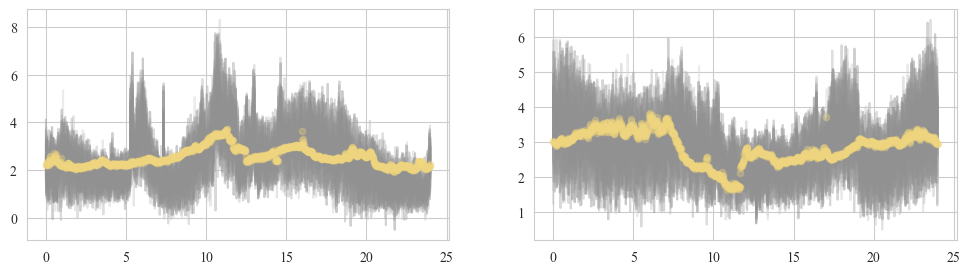

In [183]:
chemical = 'Isoprene'

# 分别处理 JH 和 CM 地点的数据
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
places = ['JH', 'CM']
results = {}

for i,place in enumerate(places):
    data=dataall[dataall.place == place]
     
    # 计算每小时的平均值
    datare = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    
    # 准备 DataFrame
    dataj = pd.DataFrame({
        "Time": pd.to_datetime(datare["Hour_Min"]),
        "T": datare["Temperature"],
        "hv": datare["Radiation"],
        "RH": datare["Humidity"],
        "O3": datare.O3,
        "NOx": datare.NOx,
        "SO2": datare.SO2,
        "SOA": datare.SOA,
        "K": 1
    })
    
     
    data_grouped = data.groupby(["Hour_Min"]).mean(numeric_only=True).reset_index()
    data_grouped["Concentration"] = data_grouped[chemical]
    grouped_by_hour = data_grouped.groupby('Hour')
    normality_df = normal_distribution_fit_and_test(grouped_by_hour[chemical])
    normality_df['T'] = data_grouped.groupby('Hour').mean(numeric_only=True)["Temperature"]
    # 提取数据
    T = normality_df['T'].values
    mean_values = normality_df['Mean'].astype("float").values
    std_dev_values = normality_df['Standard Deviation'].astype("float").values ** 2
    # 去除离群值
    mean_values_filtered = remove_outliers(mean_values)
    std_dev_values_filtered = remove_outliers(std_dev_values)
    T_filtered_mean = T[np.isin(mean_values, mean_values_filtered)]
    T_filtered_std_dev = T[np.isin(std_dev_values, std_dev_values_filtered)]
    # 拟合模型
    params_mean, covariance_mean = curve_fit(mean_relation, T_filtered_mean, mean_values_filtered, method='trf',
                                             maxfev=10000)
    params_std_dev_filtered, covariance_std_dev = curve_fit(std_dev_relation, T_filtered_std_dev,
                                                            std_dev_values_filtered, method='trf')
    
    # 添加化学物质浓度（VOC）
    dataj["VOC"] = mean_relation(dataj['T'], *params_mean)
    dataj["VOC_std"] = std_dev_relation(dataj['T'], *params_std_dev_filtered)
    weights = 1/dataj["VOC_std"]
    
    # 计算交互变量
    dataj["HNO3"] = dataj["RH"] * dataj["NOx"]
    dataj["H2SO4"] = dataj["RH"] * dataj["SO2"]
    dataj["H2SO403"] = dataj["RH"] * dataj["SO2"] * dataj["O3"]
    dataj["HNO3O3"] = dataj["RH"] * dataj["NOx"] * dataj["O3"]
    dataj["O3hv"] = dataj["O3"] * dataj["hv"]
    
    # 将这些变量乘以VOC
    variables_to_regress = ["HNO3", "H2SO4", "H2SO403", "HNO3O3", "O3hv", "K", "hv"]
    for var in variables_to_regress:
        dataj[var + "_VOC"] = dataj[var] * dataj["VOC"]
    
    # 选择变量进行线性回归
    X = dataj[[var + "_VOC" for var in variables_to_regress]]
    Y = dataj["SOA"]
    
    
    
     # 逐步删除 VIF 高的变量
    max_vif = 10  # VIF 阈值
    removed_features = []  # 记录被删除的特征
    while True:
        vif = pd.DataFrame()
        vif["feature"] = X.columns
        vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        # 找到最大 VIF 值的特征
        max_vif_value = vif["VIF"].max()
        max_vif_feature = vif.loc[vif["VIF"].idxmax(), "feature"]
        
        # 检查是否需要删除特征
        if max_vif_value > max_vif:
            X = X.drop(columns=[max_vif_feature])
            removed_features.append(max_vif_feature)
        else:
            break

    # 执行加权最小二乘回归
    model = sm.WLS(Y, X, weights=weights).fit(cov_type='HC3')

    
    # 进行线性回归
    model = sm.WLS(Y, X, weights=weights).fit(cov_type='HC3')
    
    # 预测值
    y_pred = model.predict(X)
    # 计算 MSE
    mse = mean_squared_error(Y, y_pred)
    
    # 计算 RMSE
    rmse = np.sqrt(mse)
    
    # 计算 NMSE（基于方差归一化的 NMSE）
    var_y = np.var(Y)  # 目标变量 Y 的方差
    nmse = mse / var_y  # 方差归一化的 NMSE
    
    # 从模型对象中提取信息并存储结果
    coefficients_pvalues = {f'{param}': f'{coef:.4f} (p={pval:.3f})' for param, coef, pval in
                            zip(X.columns, model.params, model.pvalues)}
    
    
    
    
    
    
   
    meansoa=model.predict(X)
    # residuals = meansoa - model.predict(X)
    # std_dev_soa = residuals
    
    # # 动态计算每个数据点的 k
    k_values = model.predict(X) / mean_relation(data_grouped['Temperature'], *params_mean)

    # 使用 std_dev_relation 计算 VOCs 的方差
    std_dev_soa = k_values * np.sqrt(std_dev_relation(data_grouped['Temperature'], *params_std_dev_filtered)).values

    
    ax_hour = axes[i]
    
    def hour_min_to_float(hour_min_str):
        hour, minute = map(int, hour_min_str.split(":"))
        return hour + minute / 60.0
    
    data_grouped['Hour_Float'] =data_grouped['Hour_Min'].apply(hour_min_to_float)
    
    ax_hour.scatter(data_grouped['Hour_Float'], data_grouped['SOA'], color='#F1D77E', alpha=0.3, marker='o', s=20,zorder=10)
    
    # 设置调色板
    ns=50
    cmap = sns.light_palette("grey", as_cmap=True)
    palette = [cmap(x) for x in np.linspace(0.2, 0.85, ns)]
    for j in range(ns):
        simulated_path = norm.rvs(loc=meansoa,
                                  scale=std_dev_soa, size=data_grouped['Temperature'].shape[0])
        ax_hour.plot(data_grouped['Hour_Float'], simulated_path, color=palette[j], alpha=0.5)
    
    for _ in range(1000):
        # 生成模拟路径
        simulated_path = np.random.normal(
            loc=meansoa,
            scale=std_dev_soa,
            size=data_grouped.shape[0]
        )



In [196]:
simulated_path = np.random.normal(
        loc=meansoa,
        scale=std_dev_soa,
        size=data_grouped.shape[0]
    )

In [187]:
len(simulated_path)

1440

<Axes: ylabel='Density'>

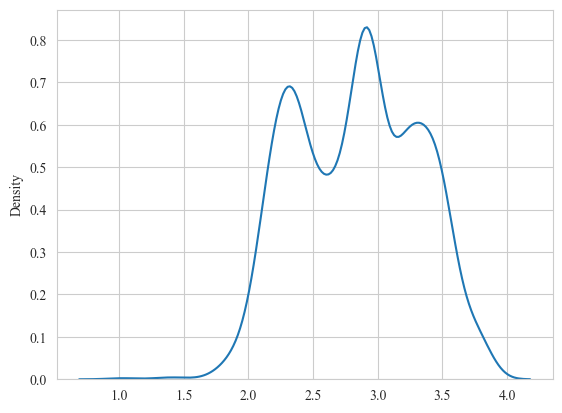

In [197]:
sns.kdeplot(meansoa)

<Axes: xlabel='SOA', ylabel='Density'>

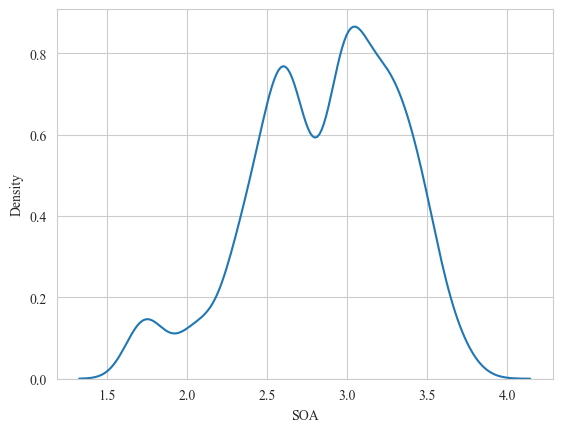

In [199]:
sns.kdeplot(Y)

In [83]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 WLS Regression Results                                
=======================================================================================
Dep. Variable:                    SOA   R-squared (uncentered):                   0.994
Model:                            WLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                          3.967e+04
Date:                Sun, 10 Nov 2024   Prob (F-statistic):                        0.00
Time:                        15:43:48   Log-Likelihood:                          33.760
No. Observations:                1440   AIC:                                     -53.52
Df Residuals:                    1433   BIC:                                     -16.61
Df Model:                           7                                                  
Covariance Type:                  HC3                                                  
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
HNO3_VOC        0.0001    9.1e-05      1.195      0.232   -6.96e-05       0.000
H2SO4_VOC       0.0050      0.000     23.814      0.000       0.005       0.005
H2SO403_VOC -5.186e-05   6.67e-06     -7.776      0.000   -6.49e-05   -3.88e-05
HNO3O3_VOC  -5.342e-05   4.22e-06    -12.672      0.000   -6.17e-05   -4.52e-05
O3hv_VOC        0.0034      0.000     13.424      0.000       0.003       0.004
K_VOC           1.1702      0.038     30.571      0.000       1.095       1.245
hv_VOC         -0.1379      0.010    -13.138      0.000      -0.158      -0.117
==============================================================================
Omnibus:                       33.435   Durbin-Watson:                   0.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.269
Skew:                           0.133   Prob(JB):                     1.82e-14
Kurtosis:                       3.992   Cond. No.                     1.46e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
[3] The condition number is large, 1.46e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""